In [22]:

with open('t.txt') as f:
    data = f.read().strip()

data = data.split('\n')

In [23]:
len(data)

50

In [24]:
len(set(data))

50

In [27]:
with open('t.txt', 'r') as f:
    subjects_paths = f.readlines()
len(set([subject_path.strip() for subject_path in subjects_paths]))  

50

In [28]:
str([1,2,3])

'[1, 2, 3]'

In [1]:
import shutil
from pathlib import Path
from PIL import Image
import nibabel as nib
from nilearn import plotting
from nilearn.datasets import load_mni152_template
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


# add this to the load module
def create_directory(path):
    if not path.exists():
        path.mkdir(parents=True, exist_ok=True)


In [39]:
from nilearn import plotting, image
import nibabel as nib
from pathlib import Path

def process_images(
    images_paths,
    title_prefix,
    output_dir,
    template='mni152',  # Default template set as a string identifier
    cut_coords=(3, 3, 3),
    levels=[0.3],
    display_mode="ortho",
    colorbar=True,
    threshold=None,
    annotate=True,
    draw_cross=True,
    dim=-0.5,
    **kwargs,
):
    # create_directory(output_dir)
    # Load the template based on the type or identifier
    if isinstance(template, str) and template == 'mni152':
        template = load_mni152_template()  # load default MNI152 template
    elif isinstance(template, str):
        template = nib.load(template)  # load template from a provided Nifti file path
    else:
        raise ValueError("Template must be either 'mni152' or a path to a Nifti file")

    for image_path in images_paths:
        image_path = Path(image_path)
        try:
            img = nib.load(image_path)
            output_file = output_dir / f"{image_path.stem}.png"
            display = plotting.plot_anat(
                img,
                display_mode="mosaic",
                colorbar=colorbar,
                threshold=threshold,
                annotate=annotate,
                draw_cross=draw_cross,
                title=f"{title_prefix} {image_path.stem}",
                dim=dim,
                **kwargs,
            )
            display.add_contours(template, levels=levels, colors="r")
            plotting.show()
            display.close()
        except Exception as e:
            print(f"Error processing {image_path}: {e}")
            continue


In [54]:
template = "/home/niusha/Documents/Codes/mca_linear_registration/tpl-MNI152NLin2009cAsym_res-01_label-GM_probseg.nii.gz"
# paths = ["/home/niusha/Documents/Codes/mca_linear_registration/outputs_HC/rsub-3008_ses-BL.nii"]
paths = ["/home/niusha/Documents/Codes/mca_linear_registration/outputs_new_pipline/flirt/ieee/sub-150110_ses-BL.nii.gz","/home/niusha/Documents/Codes/mca_linear_registration/outputs_new_pipline/flirt/ieee/sub-3001_ses-BL.nii.gz"]

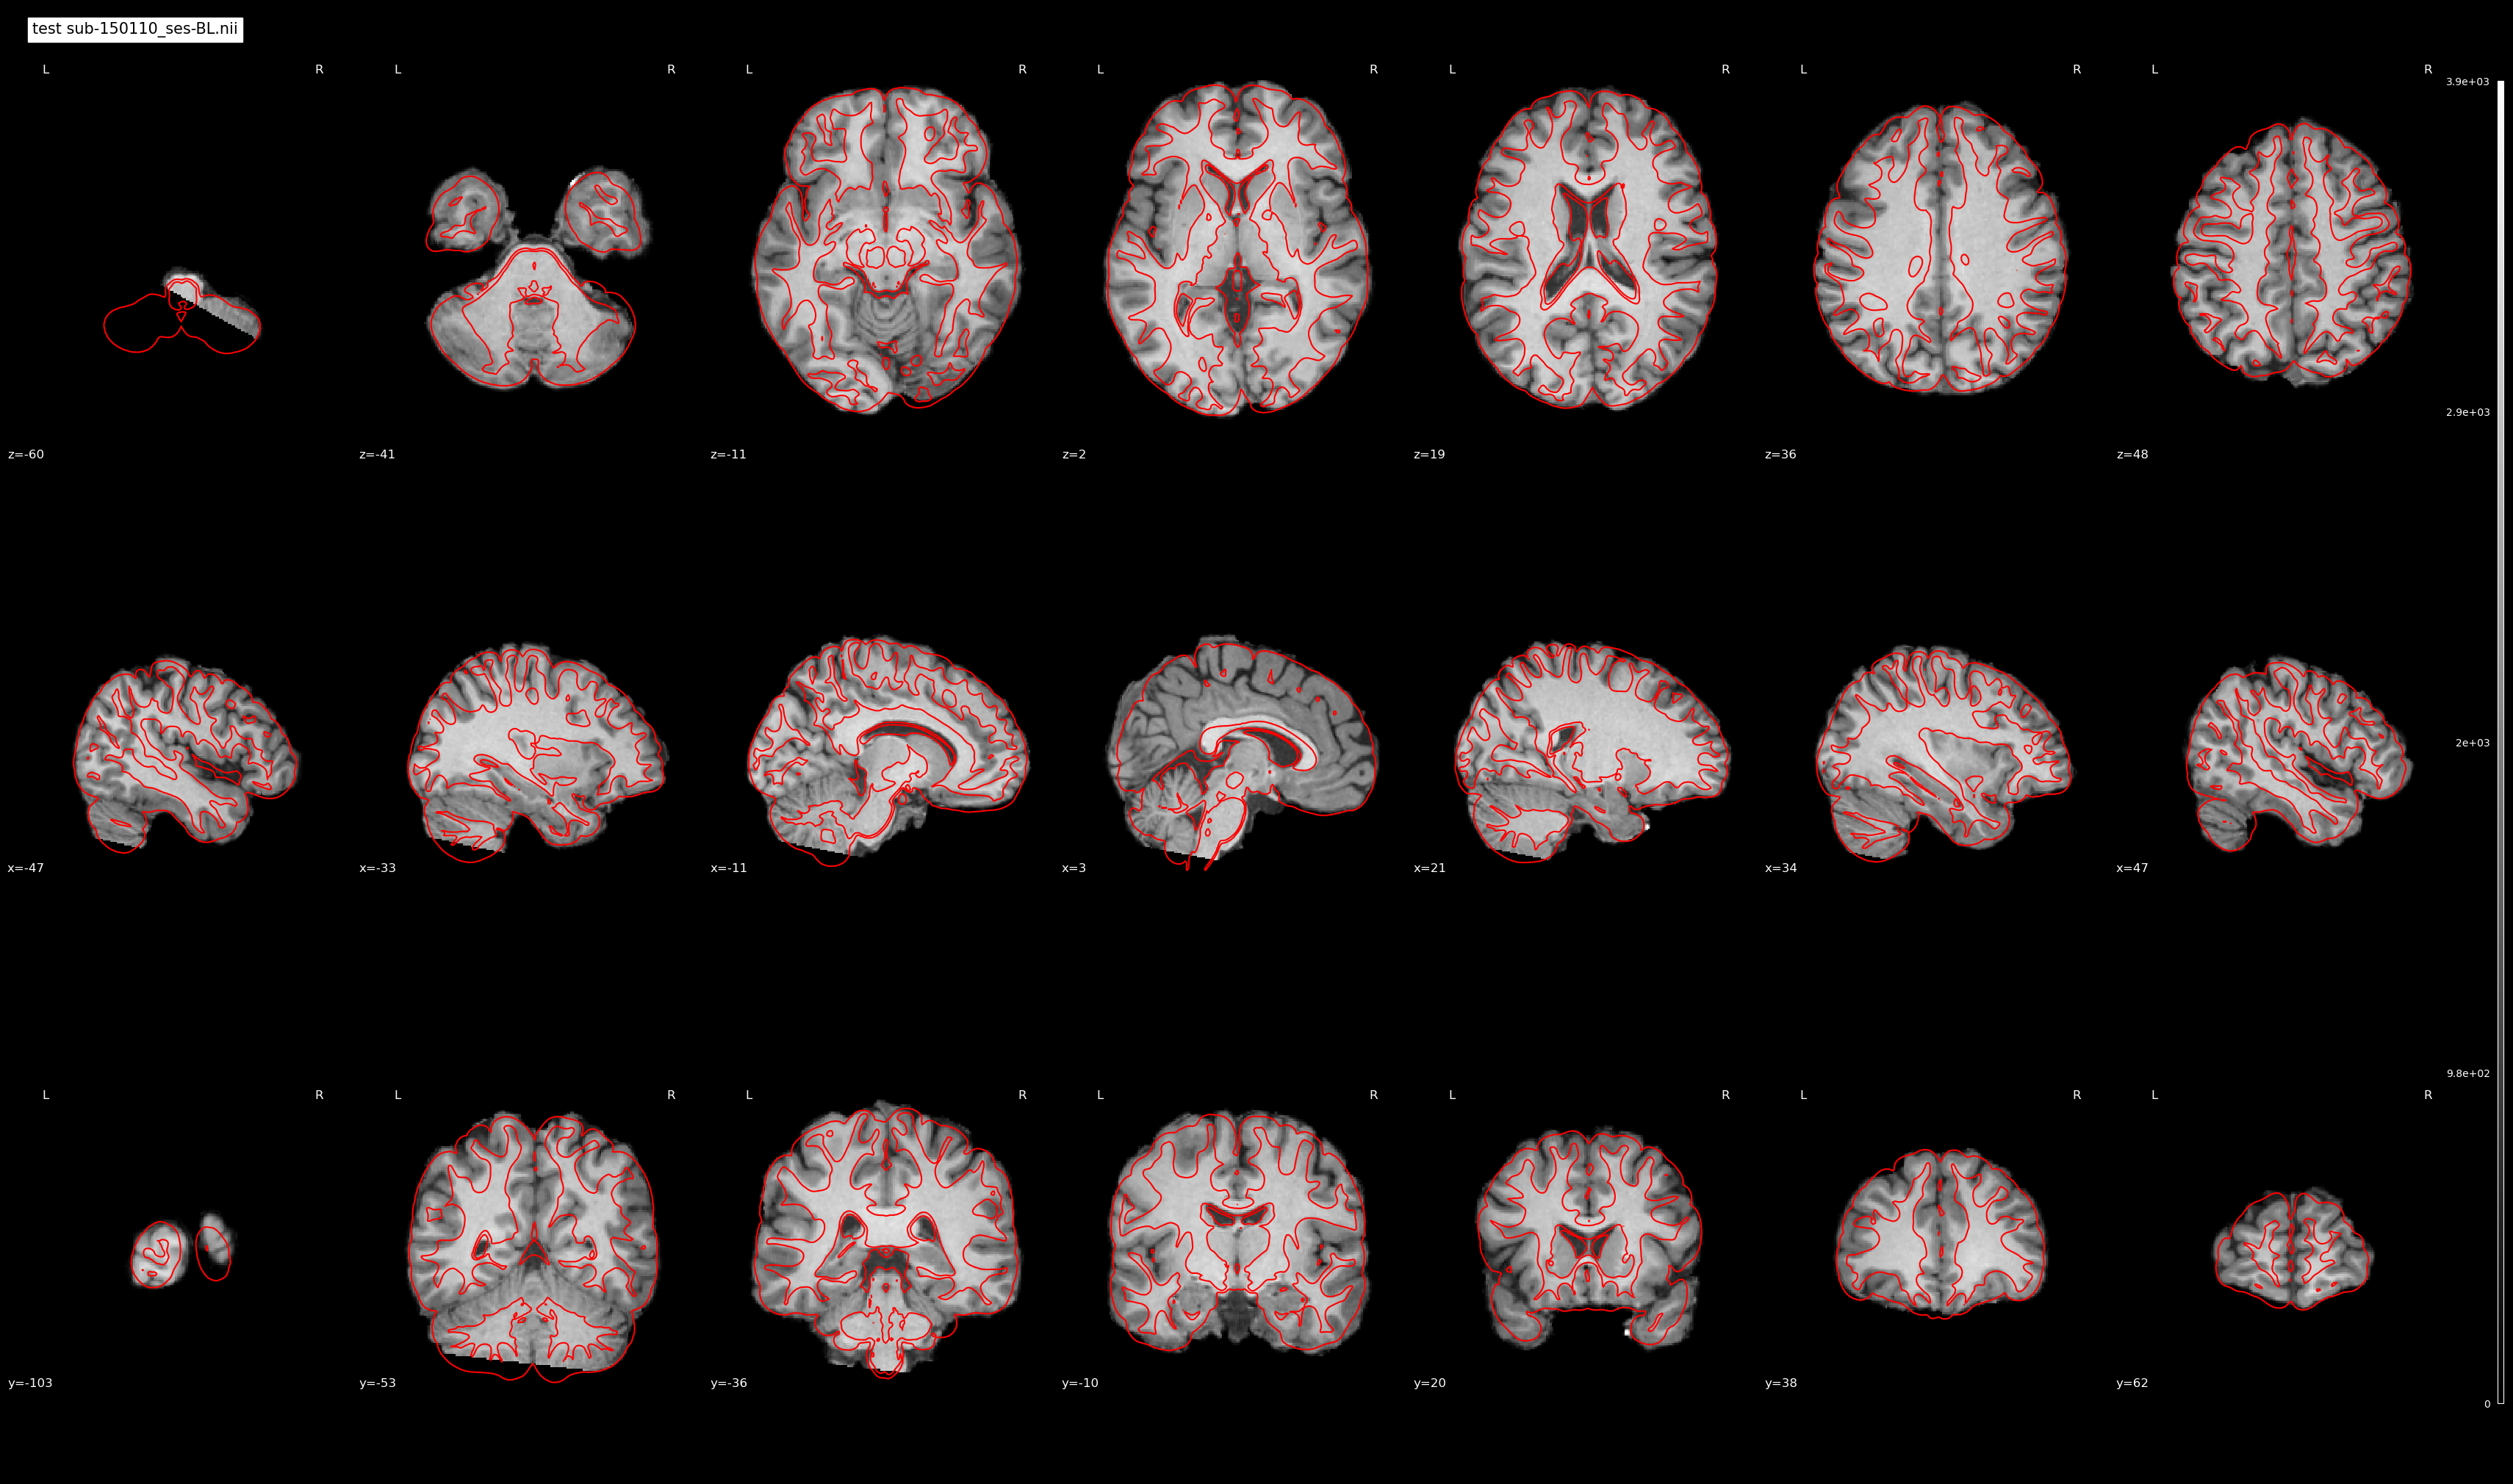

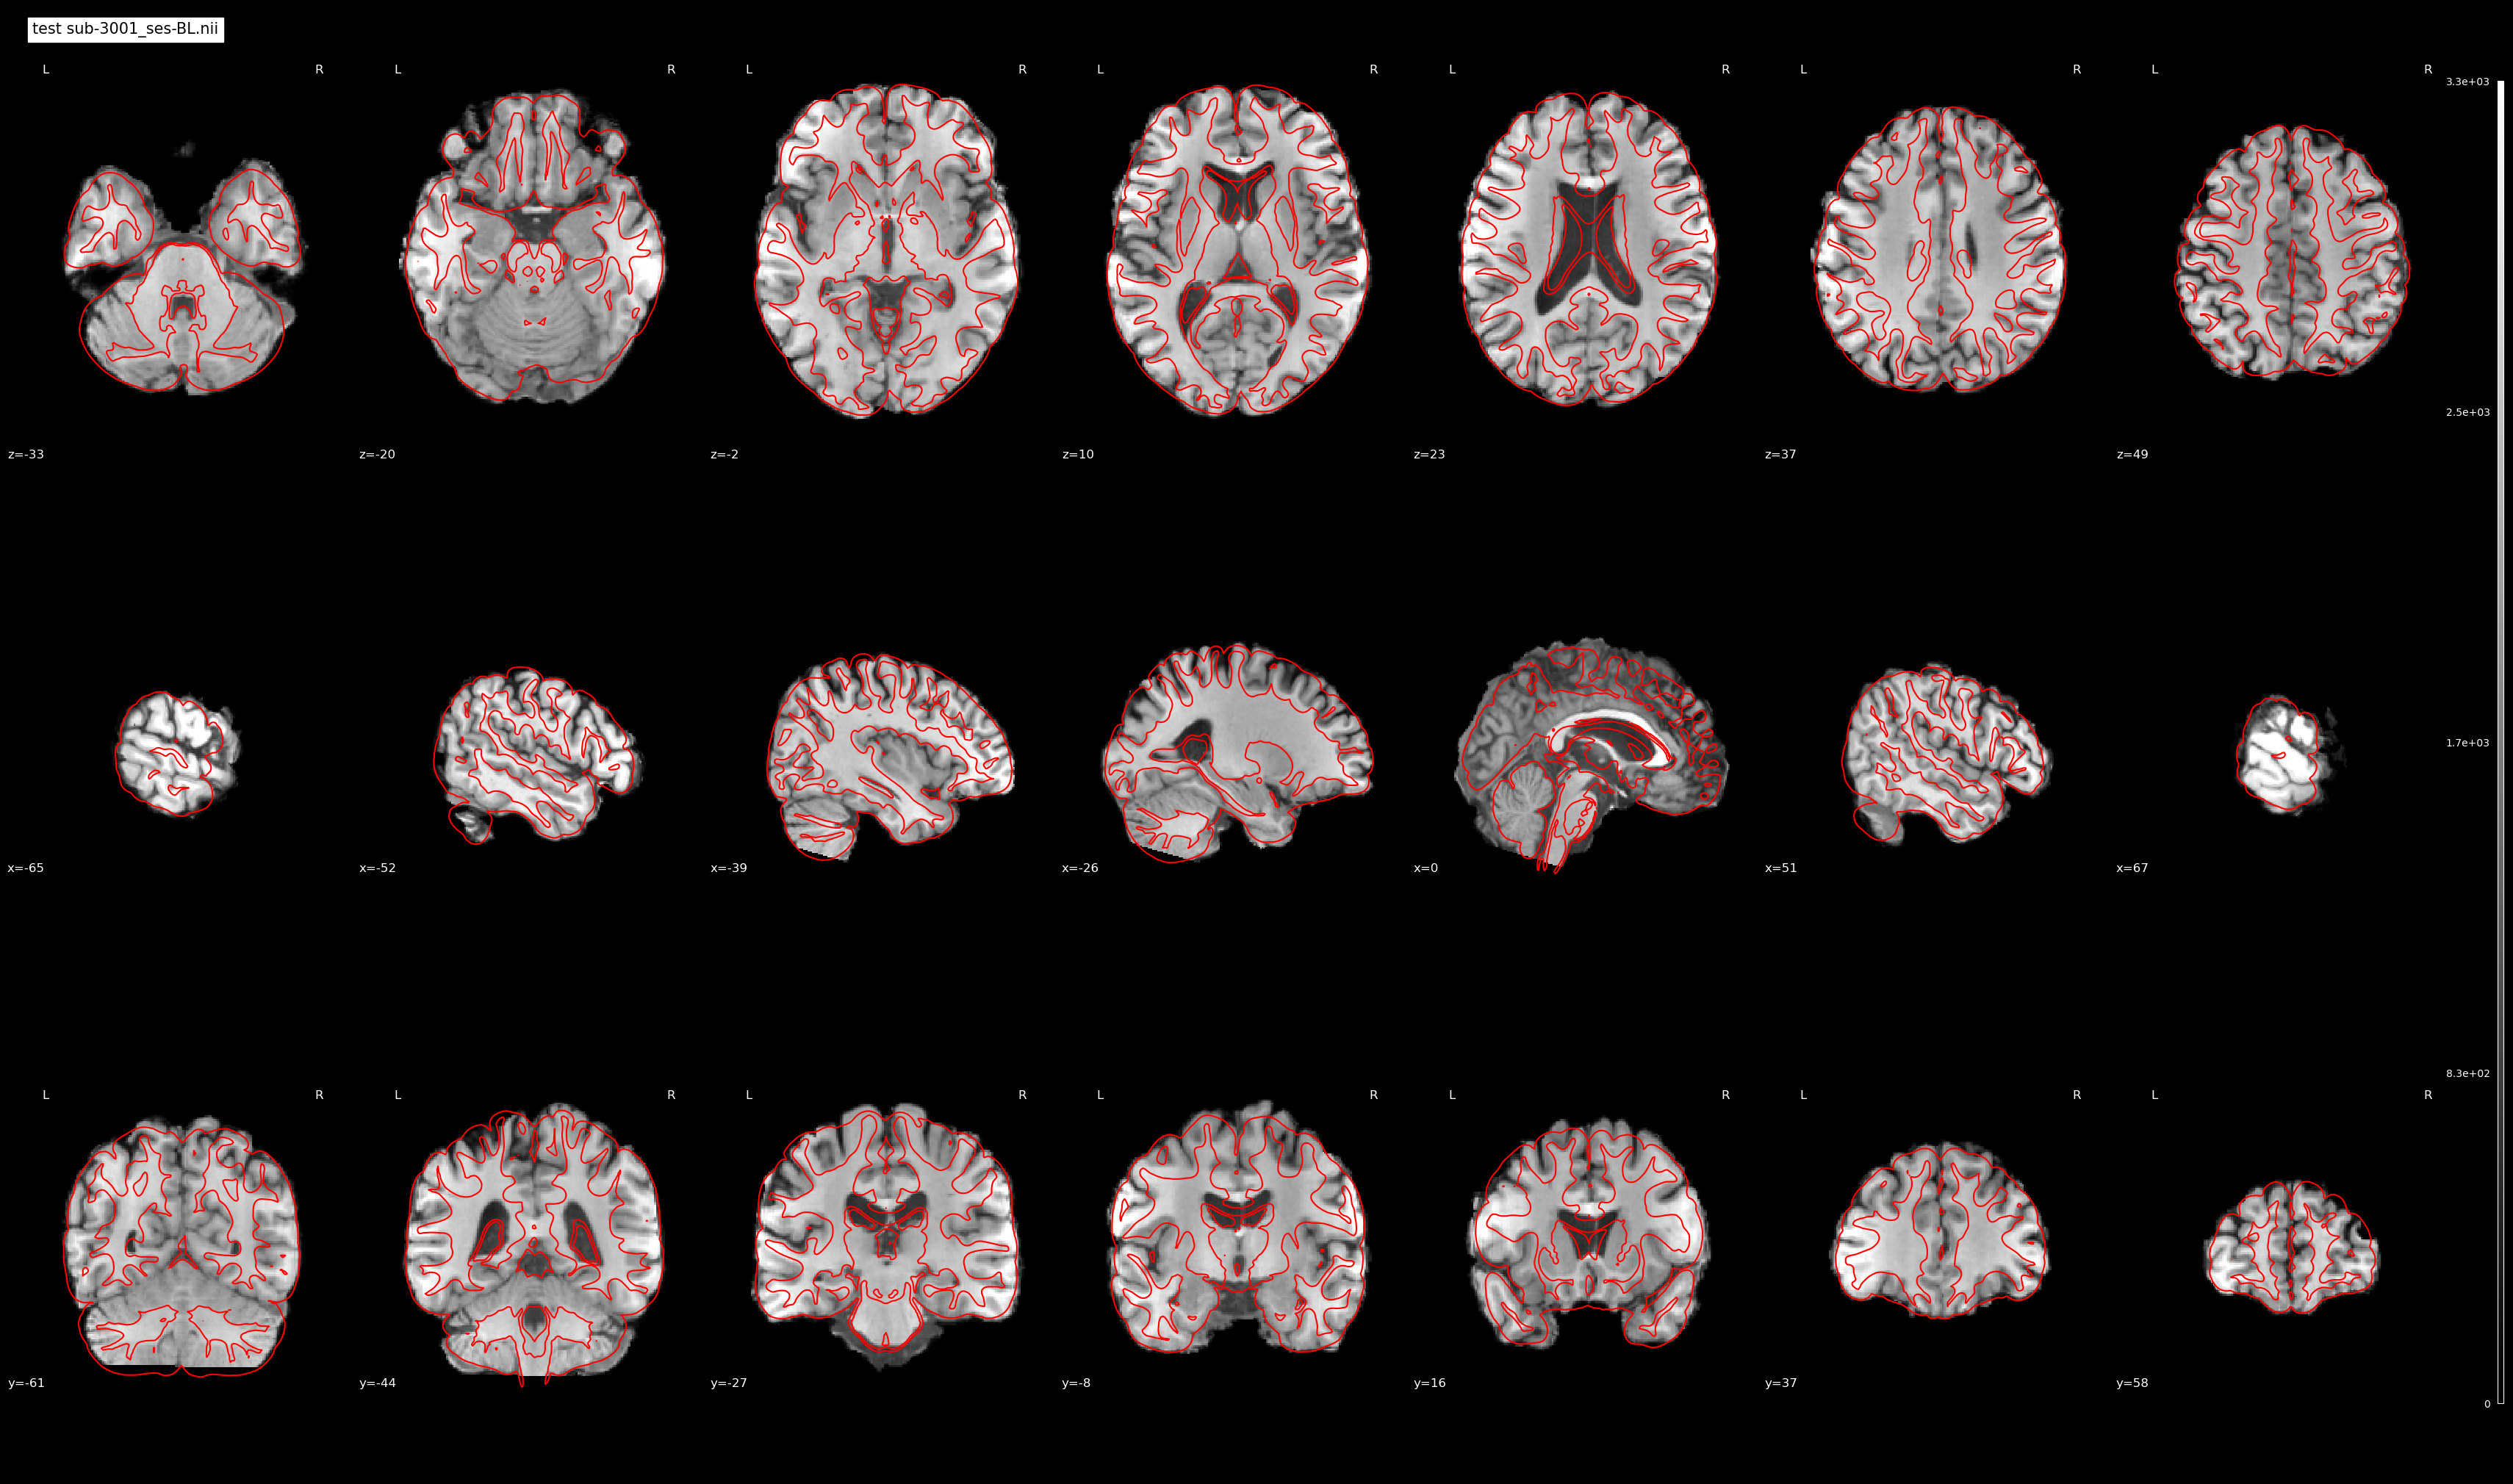

In [55]:
process_images(paths,template=template, title_prefix='test', output_dir=Path('/home/niusha/Documents/Codes/mca_linear_registration/outputs_HC/'))

In [58]:
def create_directory(path):
    if not path.exists():
        path.mkdir(parents=True, exist_ok=True)

In [59]:
def process_images(
    images_paths,
    title_prefix,
    output_dir,
    template='mni152',
    cut_coords=None,
    levels=[0.6],
    display_mode="ortho",
    colorbar=True,
    threshold=None,
    annotate=True,
    draw_cross=True,
    dim=-0.5,
    **kwargs,
):

    create_directory(output_dir)

    if  template == 'mni152':
        template = load_mni152_template() 
    elif isinstance(template, str):
        template = nib.load(template)  
    else:
        raise ValueError("Template must be either 'mni152' or a path to a Nifti file")

    for image_path in images_paths:

        image_path = Path(image_path)
        try:
            img = nib.load(image_path)
            output_file = output_dir / f"{image_path.parent.name}.png"
            display = plotting.plot_anat(
                img,
                cut_coords=cut_coords,
                display_mode=display_mode,
                colorbar=colorbar,
                threshold=threshold,
                annotate=annotate,
                draw_cross=draw_cross,
                title=f"{title_prefix} {image_path.parent.name}",
                dim=dim,
                **kwargs,
            )
         
            display.add_contours(template, levels=levels, cut_coords=cut_coords, colors="r")
            plotting.show()
            # display.savefig(output_file)
            # display.close()

        except Exception as e:
            print(f"Error processing {image_path}: {e}")
            continue


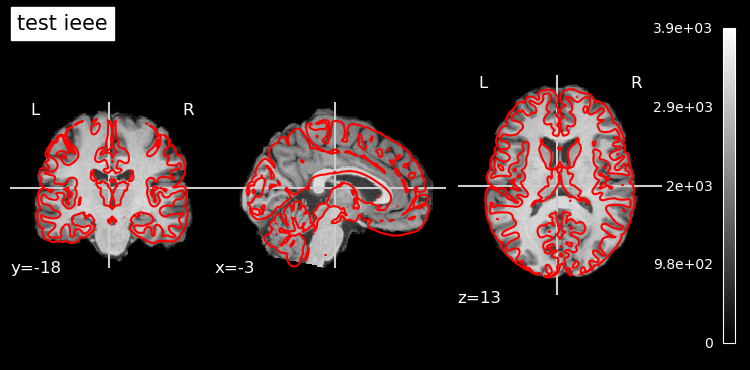

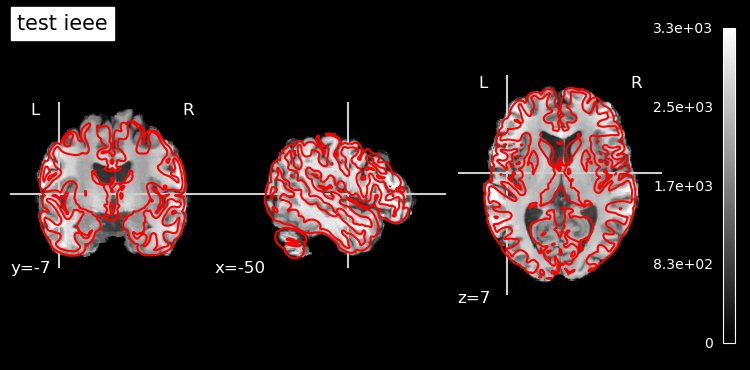

In [61]:
process_images(paths,template=template, title_prefix='test',display_mode="ortho", output_dir=Path('/home/niusha/Documents/Codes/mca_linear_registration/outputs_HC/'))

In [23]:
from nilearn import plotting, image
import nibabel as nib
from pathlib import Path

def process_images(
    images_paths,
    title_prefix,
    output_dir,
    template='mni152',  # Default template set as a string identifier
    cut_coords_list=None,  # List of tuples for different cut coordinates
    levels=[0.3],
    display_mode="ortho",
    colorbar=True,
    threshold=None,
    annotate=True,
    draw_cross=True,
    dim=-0.5,
    **kwargs,
):
    # Create output directory if it doesn't exist
    # output_dir = Path(output_dir)
    # output_dir.mkdir(parents=True, exist_ok=True)

    # Load the template based on the type or identifier
    if isinstance(template, str) and template == 'mni152':
        template = load_mni152_template() # Load default MNI152 template
    elif isinstance(template, str):
        template = nib.load(template)  # Load template from a provided Nifti file path
    else:
        raise ValueError("Template must be either 'mni152' or a path to a Nifti file")

    for image_path in images_paths:
        image_path = Path(image_path)
        try:
            img = nib.load(image_path)
            for idx, cut_coords in enumerate(cut_coords_list, start=1):
                output_file = output_dir / f"{image_path.stem}_slice_{idx}.png"
                display = plotting.plot_anat(
                    img,
                    cut_coords=cut_coords,
                    display_mode=display_mode,
                    colorbar=colorbar,
                    threshold=threshold,
                    annotate=annotate,
                    draw_cross=draw_cross,
                    title=f"{title_prefix} {image_path.stem} Slice {idx}",
                    dim=dim,
                    **kwargs,
                )
                display.add_contours(template, levels=levels, colors="r")
                display.show()
                # display.close()
        except Exception as e:
            print(f"Error processing {image_path}: {e}")
            continue

# Example usage
images_paths = ["path/to/image1.nii", "path/to/image2.nii"]
cut_coords_list = [(1, 0, 0), (2, 0, 0), (3, 0, 0), (0, 1, 0), (0, 2, 0), (0, 3, 0), (0, 0, 1), (0, 0, 2), (0, 0, 3)]
process_images(paths, "Brain Scan", "/path/to/output", cut_coords_list=cut_coords_list)


Error processing /home/niusha/Documents/Codes/mca_linear_registration/outputs_new_pipline/flirt/ieee/sub-40733_ses-BL.nii.gz: unsupported operand type(s) for /: 'str' and 'str'
